# MVP Analytics – Machine Learning & Analytics

**Nome:** Luis Cláudio da Paixão Lobato

**Matrícula:** 4052025001146

**Dataset:** [Heart Disease Cleveland UCI] (https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data)

# 1. Definição do Problema


O conjunto de dados Heart Disease Cleveland da UCI contém informações anônimas sobre pacientes, incluindo características clínicas e resultados de exames. Uma das colunas, chamada CONDITION, indica a presença ou ausência de doença cardíaca nesses pacientes.

### 1.1 Hipóteses sobre o problema e tipo de Machine Leaming a ser Empregado

Hipótese a ser empregado no problema:

- Dado um conjunto de características clínicas (indica presença ou não de doença cardíaca em pacientes anônimos), o objetivo é prever, com 95% de precisão, se um paciente tem ou não doença cardíaca.

Tipo de Machine Leaming traçada:

- Este é um problema de **classificação supervisionada**. Serão criadas algumas variáveis categóricas com labels para auxiliar na análise das informações e formação do modelo.



### 1.2 Restrições na Seleção dos dados

- As variáveis categóricas, não tinham os labels criado, foi necessário a criação desses labels para o entendimento das informações;
- O total de registros de pacientes foram 297, que fere o mínimo de registros necessários para uma análise mais acurada do objeto em estudo.

### 1.3 Atributos do Dataset

O dataset Heart Disease Cleveland da UCI contém 297 amostras, com 137 pacientes na condição de doença cardíaca e 160 pacientes sem ter essa doença. Abaixo seguem os atributos:

- ***age***  (Idade em anos)

- ***sex***  (Sexo  ***[1 = masculino; 0 = feminino]***)

- ***cp***  (Tipo de dor toraxica  ***[0: angina típica (dor no peito tipica)
1: angina atípica (dor no peito, não relacionada ao coração)
2: dor não anginosa (espasmos, não relacionados ao coração)
3: assintomático (dor toraxica, sem sinais da doença)]***)

- ***trestbps***  (Pressão arterial em repouso em bps )

- ***chol***  (Colesterol total em mg/dl)

- ***fbs***  (Glicemia em jejum > 120 mg/dl ***[1 = verdadeiro; 0 = falso)***)

- ***restecg***  (Resultados eletrocardiográficos em repouso  ***[ 0: normal
 1: com anormalidade da onda ST-T (inversões da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)
 2: apresentando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]***)

- ***thalach*** (Frequência cardíaca máxima atingida em bps)

- ***exang***  (Dor induzida pelo exercício físico  ***[1 = sim; 0 = não]***)

- ***oldpeak*** (Depressão induzida pelo exercicio físico (observa o stress do coração durante o exercicio físico))

- ***slope***  (Inclinação do pico do segmento do exercício físico  ***[0: ascendente, 1: plano, 2: descida]***)

- ***ca***  (Número de vasos principais comprometidos (0-3) coloridos por fluorosopia )

- ***thal***  (Resultado do estresse de tálio  ***[0: normal, 1: defeito corrigido 2: defeito reversível]***)

- ***condition***  (Condição Cardíaca  ***[0 = sem doença,  1 = doença]***)






# 2. Análise de Dados - EDA

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset eart Disease Cleveland UCI, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

### 2.1 Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Heart Disease Cleveland UCI.

In [1]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install seaborn
#%pip install -U scikit-learn
#%pip install scipy
#%pip install xgboost -q

# Data Analysis and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#transformação dos dados box -cox
from scipy.stats import boxcox

# Machine Learning Libraries - treino e teste
from sklearn.model_selection import train_test_split

#validação cruzada
from sklearn.model_selection import StratifiedKFold

######modelos######
#modelo de regressão logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#modelo de vizinhos mais próximos (kneighbors classifier)
from sklearn.neighbors import KNeighborsClassifier
#modelo de floresta aleatória (random forest classifier)
from sklearn.ensemble import RandomForestClassifier
#Gradient Boosting (XGBoost ou LightGBM)
from sklearn.ensemble import GradientBoostingClassifier
#- Support Vector Machine (SVM
from sklearn.svm import SVC

#####ajuste de hiperparâmetros######
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve
#import time
#import warnings
#from xgboost import XGBClassifier
#from sklearn.metrics import accuracy_score
#from scipy.stats import randint, uniform, loguniform
#from sklearn.model_selection import learning_curve
#from sklearn.ensemble import GradientBoostingClassifier




In [2]:
#baixando o dataset e carregando no pandas
# O dataset é sobre doenças cardíacas e foi baixado do Kaggle
url = 'https://github.com/luiscpl/PUC_MVP_MACHINE_LEARNING/blob/main/heart_cleveland_upload.csv?raw=true'
response = requests.get(url)
decoded_content = response.content.decode('utf-8')
df = pd.read_csv(url)

In [3]:
#exibindo as primeiras linhas do dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


- Realizando uma análise inicial dos dados do dataset, nenhuma anormalidade foi encontrada;
- Algumas variáveis que, de acordo com a definição no dicionário de dados, são categóricas foram excluídas do dataset original. Em seu lugar, foram criadas novas variáveis categóricas com identificação de rótulos (labels), com o objetivo de não influenciar a análise descritiva do conjunto de dados;
- A seguir, apresenta-se a rotina de criação das variáveis categóricas com seus respectivos rótulos (labels), bem como a exclusão de algumas variáveis originais que, por sua natureza, não contribuem significativamente para a análise descritiva nem para a construção do modelo preditivo.

In [4]:
###criando variaveis categóricas com labels das variáveis originais

##labels da coluna Sex
df['sex_label'] = df['sex'].map({1: 'masculino', 0: 'feminino'})
df[['sex', 'sex_label']].head()

# Cria os labels para a coluna 'cp'
cp_labels = {
    0: "angina típica (dor no peito tipica)",
    1: "angina atípica (dor no peito, não relacionada ao coração)",
    2: "dor não anginosa (espasmos, não relacionados ao coração)",
    3: "assintomático (dor toraxica, sem sinais da doença)"
}

df['cp_label'] = df['cp'].map(cp_labels)
df[['cp', 'cp_label']].head()


# Cria a coluna de labels para a variável 'fbs'
df['fbs_label'] = df['fbs'].map({1: 'verdadeiro', 0: 'falso'})
df[['fbs', 'fbs_label']].head()

# Cria a coluna de labels para a variável 'restecg'
restecg_labels = {
    0: "normal",
    1: "com anormalidade da onda ST-T (inversões da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)",
    2: "apresentando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes"
}

df['restecg_label'] = df['restecg'].map(restecg_labels)
df[['restecg', 'restecg_label']].head()



# Cria a coluna de labels para a variável 'exang'
df['exang_label'] = df['exang'].map({1: 'sim', 0: 'não'})
df[['exang', 'exang_label']].head()


# Cria os labels para a coluna 'slope'
slope_labels = {
    0: "ascendente",
    1: "plano",
    2: "descida"
}

df['slope_label'] = df['slope'].map(slope_labels)
df[['slope', 'slope_label']].head()



# Cria os labels para a coluna 'thal'
thal_labels = {
    0: "normal",
    1: "defeito corrigido",
    2: "defeito reversível"
}

df['thal_label'] = df['thal'].map(thal_labels)
df[['thal', 'thal_label']].head()



# Cria os labels para a coluna 'condition'
condition_labels = {0: 'sem doença', 1: 'doença'}
df['condition_label'] = df['condition'].map(condition_labels)
df[['condition', 'condition_label']].head()


####excluindo as colunas originais
df = df.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'condition'])

### 2.2 Estatística Descritivas

In [5]:
# dimensão do dataset
print("dimensão do dataset:", df.shape)

# Informações sobre tipos de dados e valores ausentes
df.info()
print("-" * 40)
# Resumo estatístico de variáveis ​​numéricas
df.describe()

dimensão do dataset: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              297 non-null    int64  
 1   trestbps         297 non-null    int64  
 2   chol             297 non-null    int64  
 3   thalach          297 non-null    int64  
 4   oldpeak          297 non-null    float64
 5   ca               297 non-null    int64  
 6   sex_label        297 non-null    object 
 7   cp_label         297 non-null    object 
 8   fbs_label        297 non-null    object 
 9   restecg_label    297 non-null    object 
 10  exang_label      297 non-null    object 
 11  slope_label      297 non-null    object 
 12  thal_label       297 non-null    object 
 13  condition_label  297 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 32.6+ KB
----------------------------------------


,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


*Tabela 1: Estatísticas Descritivas*

Principais pontos da análise descritiva:
- Nenhuma variável do dataset analisado apresenta valores ausentes (missing ou NAs);
- O dataset Disease Cleveland UCI contém 297 observações, com seis variáveis numéricas inteiras, uma variável numérica do tipo float e oito variáveis categóricas;
- A idade média (variável age) dos indivíduos é de 54,5 anos, com a maioria concentrada na faixa entre 48 e 61 anos;
- A pressão arterial de repouso (trestbps) apresenta valores típicos entre 120 e 140 bps, porém com registros extremos chegando a 200 bps — podendo indicar a presença de outliers;
- Tanto a idade quanto a pressão arterial apresentam baixa dispersão, com desvios relativamente pequenos;
- O colesterol total (chol) possui ampla variabilidade, variando de 126 a 564 mg/dl, com mediana de 243 mg/dl — sugerindo valores potencialmente elevados, como o 564 mg/dl, que pode ser um outlier;
- A variável oldpeak, que mede o grau de depressão induzida pelo exercicio físico, apresenta distribuição assimétrica: média de 1,06 e valor máximo de 6,2 — este último, possivelmente um outliers;
- A variável ca, possivelmente indicando o número de vasos principais, tem distribuição concentrada em valores baixos, com mediana em 0. O valor máximo (3) também pode ser considerado um outliers.

Para uma avaliação mais precisa desses valores atípicos (Outliers), valores extremos e da distribuição, tendência central e dispersão das variáveis clínicas, será realizada uma análise visual por meio de boxplots.


### 2.3 Análise Gráfica

##### 2.3.1 Boxplot das características clínicas

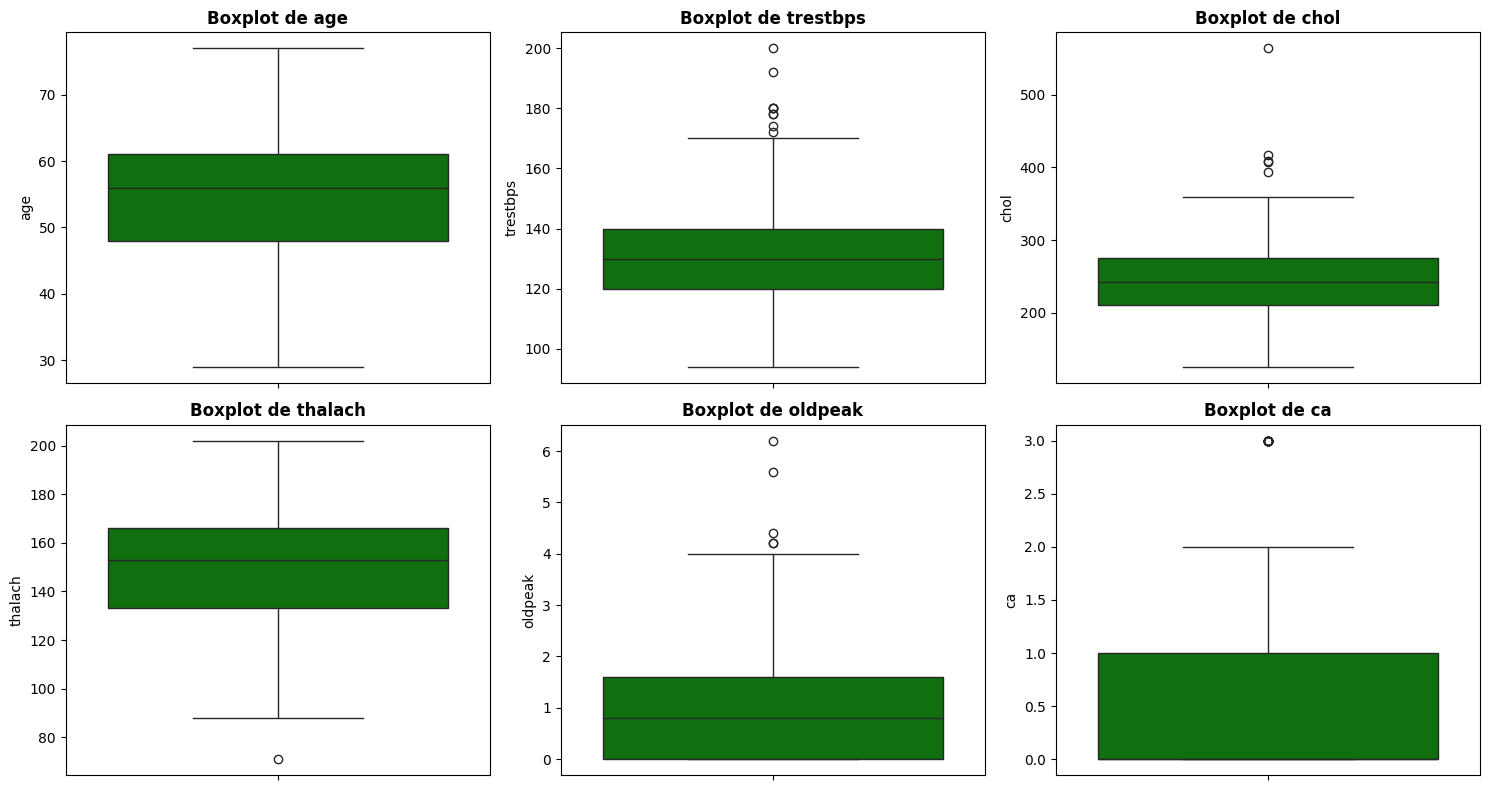

In [6]:
# Seleciona apenas as variáveis numéricas do DataFrame
numericas = df.select_dtypes(include=['int64', 'float64'])

# Cria um boxplot separado para cada variável numérica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numericas.columns):
    sns.boxplot(y=numericas[col], ax=axes[i], color='green')
    axes[i].set_title(f'Boxplot de {col}', fontweight='bold')

plt.tight_layout()
plt.show()

*Gráfico 1 - Boxplot das condições clínicas*

Ao analizar o gráfico 1 dos boxplot das características clínicas, pode-se concluir:
- A variável age apresenta distribuição aproximadamente simétrica, sem ocorrência de valores atípicos (outliers), indicando uma dispersão equilibrada dos dados em torno da mediana;
- As variáveis trestbps, chol, thalach, oldpeak e ca revelam distribuições assimétricas das informações nas figuras. Além disso, nota-se a presença de valores atípicos (Outliers), o que pode indicar variabilidade elevada ou possíveis anomalias nas observações;
- Com base na Tabela 1, verifica-se, pelos boxplots, que a variável thalach possui outliers nos limites inferiores, enquanto as variáveis trestbps, chol, oldpeak e ca apresentam outliers nos limites superiores.


##### 2.3.2 Proporção de pessoas pela condição cardíaca

In [7]:
# Conta os valores da coluna 'condition_label' e adiciona o total
contagem = df["condition_label"].value_counts()
contagem['Total'] = contagem.sum()
print(contagem)

print("-" * 40)
###calculando a propoção de cada condição cardíaca
(df["condition_label"].value_counts(normalize=True) * 100).map("{:.2f}%".format)

condition_label
sem doença    160
doença        137
Total         297
Name: count, dtype: int64
----------------------------------------


condition_label
sem doença    53.87%
doença        46.13%
Name: proportion, dtype: object

*Tabela 2:  Condição Cardíaca dos pacientes*

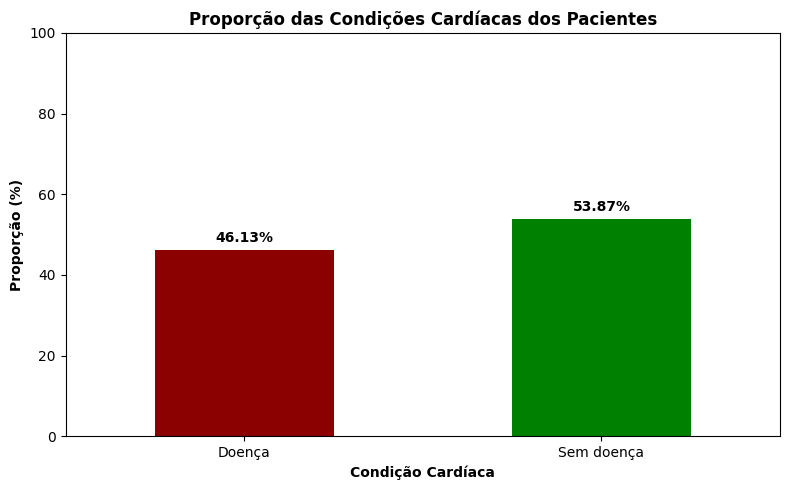

In [8]:
# Gráfico de colunas mostrando a proporção (%) de cada condição cardíaca com eixo y de 0 a 100%
proporcao = df['condition_label'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(8, 5))
ax = proporcao.plot(
    kind='bar',
    color=['#8B0000', 'green']
)
ax.set_xticklabels(['Doença', 'Sem doença'], rotation=0)
ax.set_xlabel('Condição Cardíaca', fontweight='bold')
ax.set_ylabel('Proporção (%)', fontweight='bold')
ax.set_title('Proporção das Condições Cardíacas dos Pacientes', fontweight='bold')
ax.set_ylim(0, 100)

# Adiciona os valores percentuais nas barras
for i, v in enumerate(proporcao):
    ax.text(i, v + 2, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

*Gráfico 2: Proporção das informações das Condições Cardíacas dos Pacientes*

Ao analisar o Tabela 2 com Gráfico 2, pode-se concluir que:

- A Tabela 2 revela que o conjunto de dados é composto por 137 pacientes (53,87%) com diagnóstico de doença cardíaca e 160 pacientes (46,13%) sem a condição cardíaca.
- Já o Gráfico 2 ilustra de forma visual a distribuição das classes, evidenciando um leve desbalanceamento entre os grupos, com uma proporção ligeiramente maior de indivíduos sem diagnóstico de doença cardíaca.

##### 2.3.3 Proporção da Condição Cardíaca por sexo

In [9]:
# Tabela cruzada entre sexo e condição cardíaca com totais
sexo_condicao_abs = pd.crosstab(df['sex_label'], df['condition_label'], margins=True, margins_name='Total')
print(sexo_condicao_abs)
print("-" * 40)
# Proporção entre sexo (linhas) e condição cardíaca (colunas) com totais, normalizando por coluna
sexo_condicao_prop_col = pd.crosstab(df['sex_label'], df['condition_label'], margins=True, margins_name='Total', normalize='index')
print((sexo_condicao_prop_col * 100).round(2))

condition_label  doença  sem doença  Total
sex_label                                 
feminino             25          71     96
masculino           112          89    201
Total               137         160    297
----------------------------------------
condition_label  doença  sem doença
sex_label                          
feminino          26.04       73.96
masculino         55.72       44.28
Total             46.13       53.87


*Tabela3: Proporção de sexo pela condição cardíaca*

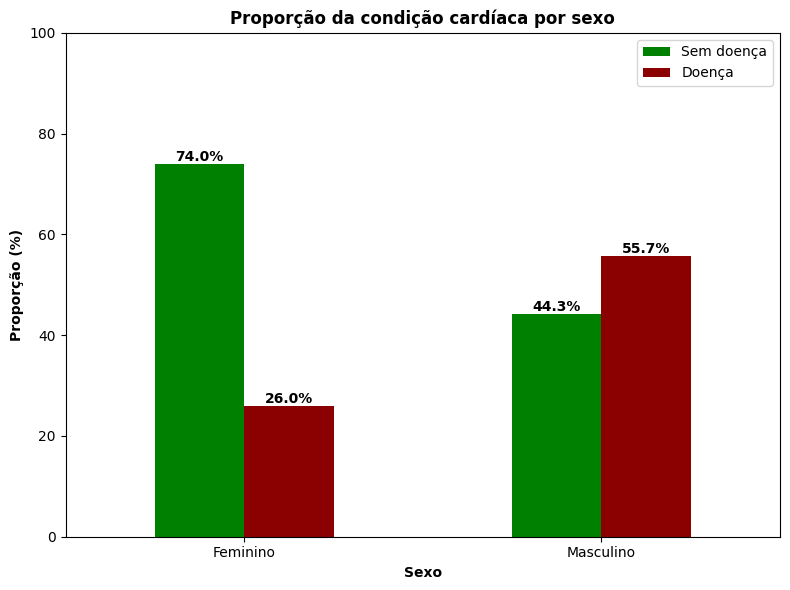

In [10]:
# Gráfico de barras agrupadas: proporção da condição cardíaca por sexo
condicao_sexo = pd.crosstab(df['sex_label'], df['condition_label'], normalize='index') * 100

ax = condicao_sexo[['sem doença', 'doença']].plot(
    kind='bar',
    color=['green', '#8B0000'],
    figsize=(8, 6)
)
ax.set_xlabel('Sexo', fontweight='bold')
ax.set_ylabel('Proporção (%)', fontweight='bold')
ax.set_title('Proporção da condição cardíaca por sexo', fontweight='bold')
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0)
ax.set_ylim(0, 100)
ax.legend(['Sem doença', 'Doença'])

# Adiciona os valores percentuais nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


*Gráfico 3: Proporção de sexo pela condição cardíaca*

Ao analisar o Tabela 3 com a Gráfico 3, pode-se concluir que:

- No grupo de pacientes com doença cardíaca, temos cerca de 26,0% pacientes do sexo feminino (25) que salta para 55,7% dos pacientes do sexo masculino (112);
- No grupo de pacientes sem doenças cardíaca, temos 74,0% dos pacientes do sexo masculino (89) que decai para 44,3% dos pacientes do sexo feminino (71).  

##### 2.3.4 Pressão Arterial em Repouso em função da idade e condição cardíaca

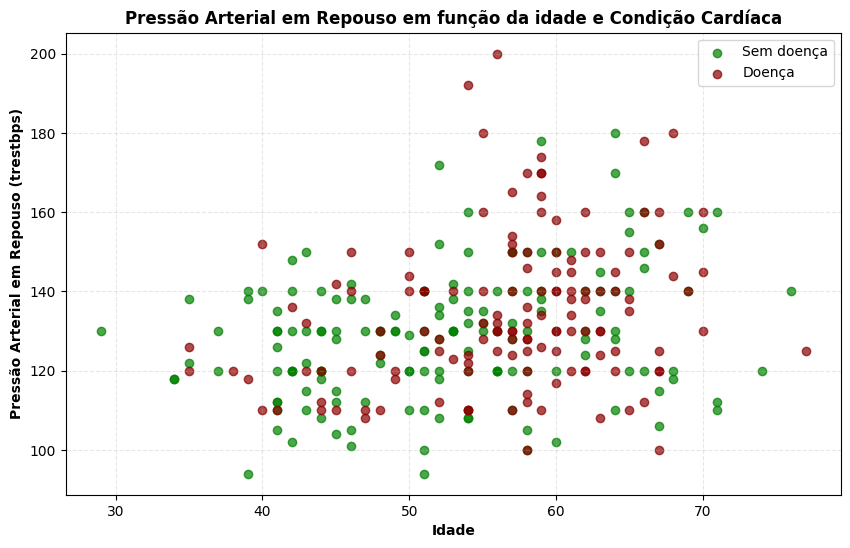

In [11]:
# Gráfico de dispersão: idade (age) vs pressão arterial em repouso (trestbps), colorido por condição cardíaca
cores = {'doença': '#8B0000', 'sem doença': 'green'}

plt.figure(figsize=(10, 6))
for cond in df['condition_label'].unique():
    subset = df[df['condition_label'] == cond]
    plt.scatter(
        subset['age'],
        subset['trestbps'],
        color=cores[cond],
        label=cond.capitalize(),
        alpha=0.7
    )

plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Pressão Arterial em Repouso (trestbps)', fontweight='bold')
plt.title('Pressão Arterial em Repouso em função da idade e Condição Cardíaca', fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*Gráfico 4: Pressão Arterial em Repouso em função da idade e Condição Cardíaca*

Análise do Gráfico 4 das pessoas com pressão arterial em repouso:

- Pacientes com doença cardíaca (em vermelho) estão distribuídos de forma ampla tanto nas idades quanto nos níveis de pressão arterial em repouso, mas há uma leve concentração entre 50 e 70 anos com pressões acima de 130 bps.
- Pacientes sem doença cardíaca (verde) estão igualmente espalhados, mas um número considerável aparece com pressão arterial entre 120–140 bps, especialmente entre 40 e 60 anos.
- Identificam-se dois pacientes sem diagnóstico de doença cardíaca com pressão arterial inferior a 100 bps e três pacientes apresentam pressão arterial em repouso entre 180 e 200 bps com diagnóstico de doença cardíaca, estes quais podem ser considerados valores atípicos (outliers).


##### 2.3.5 Doença cardíaca em função da idade e da frequência cardíaca máxima

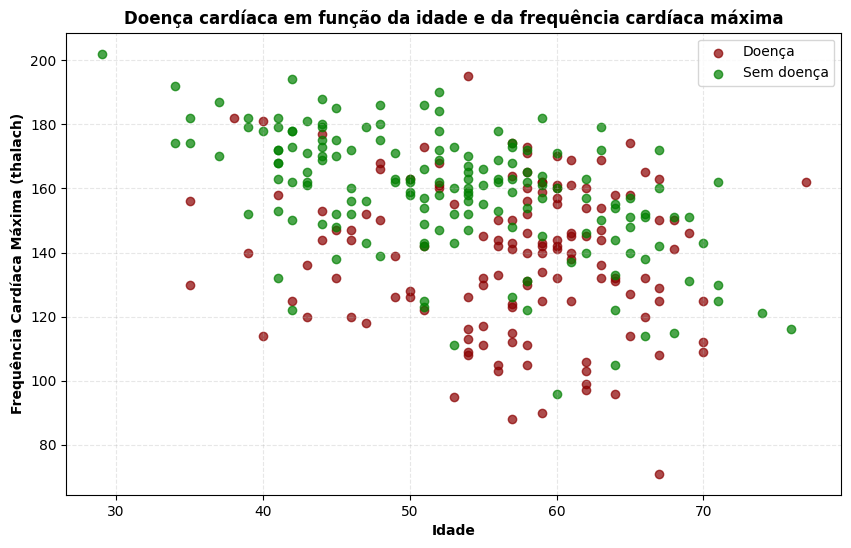

In [12]:
# Plotando age vs thalach para cada condição cardíaca com cores diferentes
plt.figure(figsize=(10, 6))
plt.scatter(
    df[df['condition_label'] == 'doença']['age'],
    df[df['condition_label'] == 'doença']['thalach'],
    color='#8B0000', label='Doença', alpha=0.7  # vermelho escuro
)
plt.scatter(
    df[df['condition_label'] == 'sem doença']['age'],
    df[df['condition_label'] == 'sem doença']['thalach'],
    color='green', label='Sem doença', alpha=0.7  # verde
)
plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Frequência Cardíaca Máxima (thalach)', fontweight='bold')
plt.title('Doença cardíaca em função da idade e da frequência cardíaca máxima', fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*Gráfico 5: Doença cardíaca em função da idade e da frequência cardíaca máxima*

Análise do Gráfico 5 das pessoas com pressão arterial máxima:
- Pacientes com doença cardíaca (vermelho) tendem a estar mais concentrados nas faixas etárias intermediárias a avançadas (acima de 50 anos) e se concentram com frequência cardíaca máxima entre 80 até 180 bps;
- Pacientes sem doença cardíaca (verde) se distribuem de maneira mais homogênea entre as faixas etárias, embora também predominem em idades médias.
- Indivíduos sem doença cardíaca parecem apresentar, em média, frequência cardíaca máxima mais alta, especialmente entre os mais jovens;
- Observam-se alguns pontos isolados em ambos os extremos do gráfico, tanto em termos de idade (entre 60 até 70 anos paciente com doença cardíaca) quanto de frequência cardíaca (abaixo de 30 anos, paciente sem doença cardíaca), que podem representar casos atípicos (Outiliers).


##### 2.3.6 Condição Cardíaca em função da idade e do colesterol total

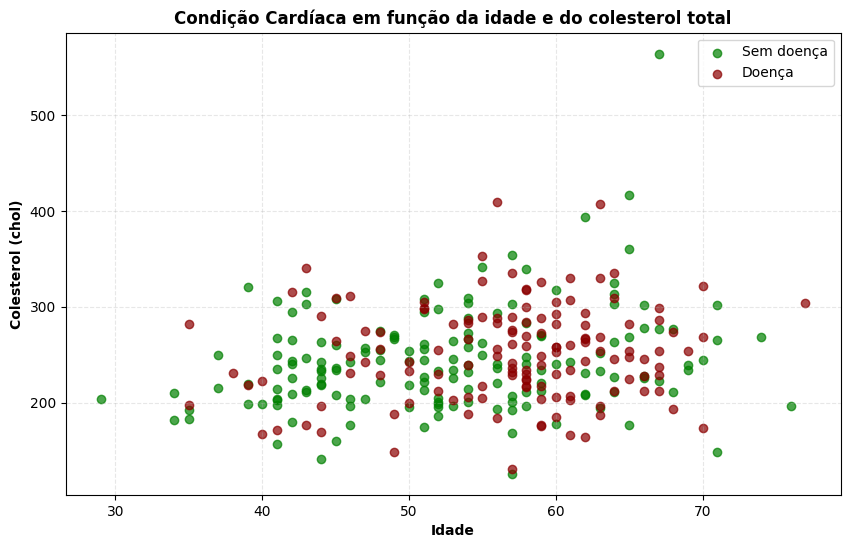

In [13]:
# Gráfico de dispersão: colesterol (chol) vs idade (age), colorido por condição cardíaca
plt.figure(figsize=(10, 6))
for cond in df['condition_label'].unique():
    subset = df[df['condition_label'] == cond]
    plt.scatter(
        subset['age'],
        subset['chol'],
        color=cores[cond],
        label=cond.capitalize(),
        alpha=0.7
    )

plt.xlabel('Idade', fontweight='bold')
plt.ylabel('Colesterol (chol)', fontweight='bold')
plt.title('Condição Cardíaca em função da idade e do colesterol total', fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

*Gráfico 6: Condição Cardíaca em função da idade e do colesterol total*

De acordo com Análise do Gráfico 6, pode-se concluir:

- Os níveis de colesterol variam amplamente, concentrando-se entre 200 e 400 mg/dl, com alguns pacientes atingindo valores acima de 400 mg/dl;
- Pacientes com doença cardíaca (vermelhos) estão distribuídos por toda a faixa de idade, mas nota-se uma maior concentração em idades entre 50 e 70 anos, muitas vezes com níveis de colesterol acima de 200 mg/dl;
- Já os sem a condição (verdes) também estão presentes em todas as faixas etárias, porém tendem a ter valores mais concentrados entre 200 e 300 mg/dl, com alguns casos com colesterol elevado, mas menos frequentes;
- Acima da faixa de 500 mg/dl, existe um ponto atípico (Outliers) de paciente com colesterol elevado mas sem doença cardíaca, e mais dois pontos atípicos (Outliers) abaixo de 100 mg/dl de pacientes com e sem doença cardíaca.

##### 2.3.7 Proporção de condição cardíaca pela dor induzida pelo exercício físico

In [14]:
# Tabela de barras agrupadas: exang_label vs condition_label (valores absolutos)
exang_condition = pd.crosstab(df['exang_label'], df['condition_label'])
print("Tabela de valores absolutos:")
display(exang_condition)
print("-" * 40)
# Tabela de proporções por linha
exang_condition_prop = pd.crosstab(df['exang_label'], df['condition_label'], normalize='index')
print("\nTabela de proporções por linha (%):")
display(exang_condition_prop.applymap(lambda x: f"{x:.2%}"))

Tabela de valores absolutos:


condition_label,doença,sem doença
exang_label,,
não,63,137
sim,74,23


----------------------------------------

Tabela de proporções por linha (%):


condition_label,doença,sem doença
exang_label,,
não,31.50%,68.50%
sim,76.29%,23.71%


*Tabela 4: Distribuição da condição cardíaca pela dor induzida pelo exercício físico*

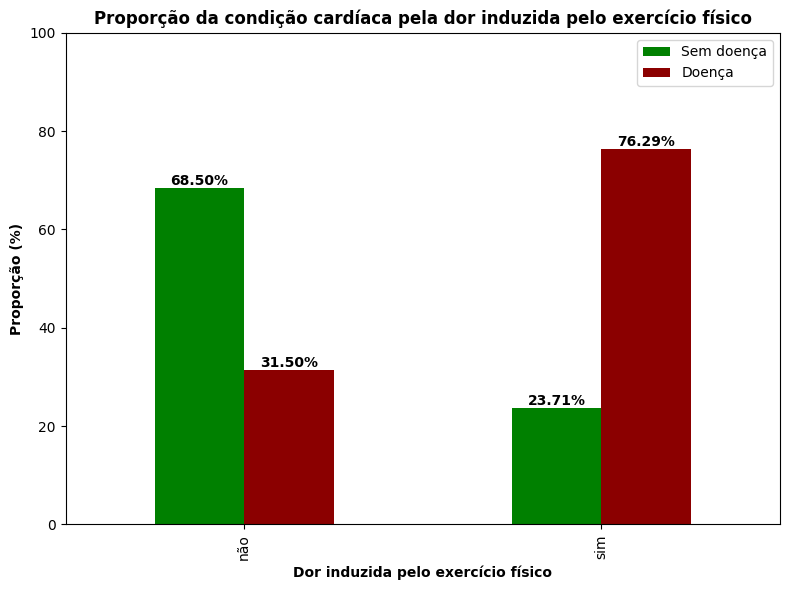

In [15]:
# Gráfico de proporção de barras agrupadas: exang_label vs condition_label com eixo y de 0 a 100%
exang_condition_prop = pd.crosstab(df['exang_label'], df['condition_label'], normalize='index') * 100

ax = exang_condition_prop[['sem doença', 'doença']].plot(
    kind='bar',
    color=['green', '#8B0000'],
    figsize=(8, 6)
)
ax.set_xlabel('Dor induzida pelo exercício físico', fontweight='bold')
ax.set_ylabel('Proporção (%)', fontweight='bold')
ax.set_title('Proporção da condição cardíaca pela dor induzida pelo exercício físico', fontweight='bold')
ax.set_ylim(0, 100)
ax.legend(['Sem doença', 'Doença'])

# Adiciona os valores percentuais nas barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontweight='bold'
    )

plt.tight_layout()
plt.show()

*Gráfico 7: Distribuição de Condição Cardíaca pela dor induzida pelo exercício físico*

- De acordo com a tabela 4 e o Gráfico 7, os pacientes que não relataram dor induzida pelo exercício físico constituem o maior grupo: 137 (68,5%) sem doença cardíaca e 63 (31,5%) com a doença cardíaca;
- Pacientes que relataram dor induzida pelo exercício físico, a maioria apresenta diagnóstico de doença cardíaca: 74 (76,29%) pacientes com a doença cardíaca versus 23 (23,71%) pacientes sem a doença cardíaca.

##### 2.3.8 Média da condição cardíaca induzida pela depresão ocasionada pelo exercício físico

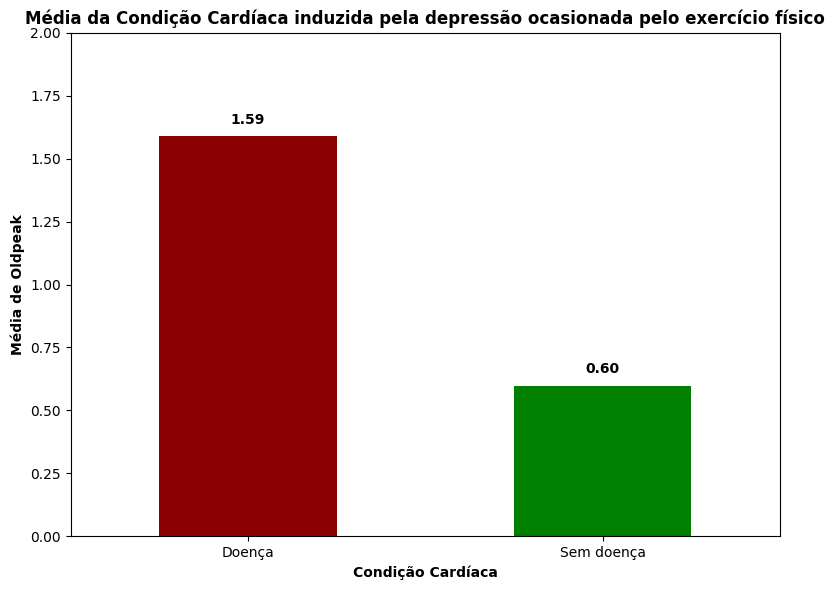

In [16]:
# Gráfico de barras: média de oldpeak por condição cardíaca com eixo y até 2
oldpeak_means = df.groupby('condition_label')['oldpeak'].mean().reindex(['doença', 'sem doença'])

ax = oldpeak_means.plot(
    kind='bar',
    color=[cores['doença'], cores['sem doença']],
    figsize=(8, 6)
)
ax.set_xlabel('Condição Cardíaca', fontweight='bold')
ax.set_ylabel('Média de Oldpeak', fontweight='bold')
ax.set_title('Média da Condição Cardíaca induzida pela depressão ocasionada pelo exercício físico', fontweight='bold')
ax.set_xticklabels(['Doença', 'Sem doença'], rotation=0)
ax.set_ylim(0, 2)

# Adiciona os valores nas barras
for i, v in enumerate(oldpeak_means):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

*Gráfico 8: Média da Condição Cardíaca induzida pela depresão ocasionada pelo exercício físico*

Analisando o Gráfico 8, temos:
- Uma diferença marcante nos níveis médios de depressão induzida por exercício físico (Oldpeak) entre indivíduos com e sem doença cardíaca;
- Pessoas com doença cardíaca apresentaram uma média de 1,59, significativamente mais alta, e as pessoas sem doença cardíaca tiveram média de 0,60, o que sugere menor alteração na condição cardíaca durante o esforço físico.


##### 2.3.9 Proporção do tipo de dor torácica pela condição cardíaca

In [17]:
# Tabela cruzada entre cp_label e condition_label
tabela_cp_condition = pd.crosstab(df['cp_label'], df['condition_label'])
tabela_cp_condition

condition_label,doença,sem doença
cp_label,,
"angina atípica (dor no peito, não relacionada ao coração)",9,40
angina típica (dor no peito tipica),7,16
"assintomático (dor toraxica, sem sinais da doença)",103,39
"dor não anginosa (espasmos, não relacionados ao coração)",18,65


*Tabela 5: Distribuição do tipo de dor torácica pela condição cardíaca*

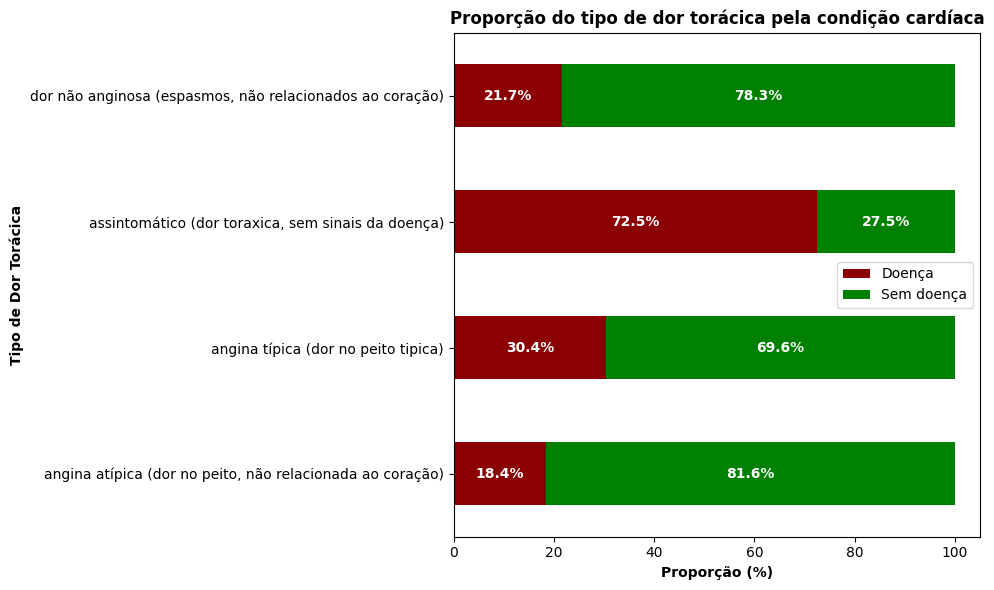

In [18]:
# Calcula a proporção (%) de cada valor de 'cp_label' por 'condition_label'
cp_condition_prop = pd.crosstab(df['cp_label'], df['condition_label'], normalize='index') * 100

# Garante a ordem das colunas para o gráfico
colunas_ordem = ['doença', 'sem doença'] if 'doença' in cp_condition_prop.columns else cp_condition_prop.columns

# Cores para as barras
cores = ['#8B0000', 'green']

# Plota o gráfico de barras empilhadas horizontal
ax = cp_condition_prop[colunas_ordem].plot(
    kind='barh',
    stacked=True,
    color=cores,
    figsize=(10, 6)
)
plt.xlabel('Proporção (%)', fontweight='bold')
plt.ylabel('Tipo de Dor Torácica', fontweight='bold')
plt.title('Proporção do tipo de dor torácica pela condição cardíaca', fontweight='bold')
plt.legend(['Doença', 'Sem doença'])

# Adiciona os valores percentuais nas barras
for i, (idx, row) in enumerate(cp_condition_prop[colunas_ordem].iterrows()):
    left = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(left + val / 2, i, f"{val:.1f}%", va='center', ha='center', color='white', fontweight='bold')
        left += val

plt.tight_layout()
plt.show()

##### 2.3.10 Distribuição de vasos principais comprometidos por condição cardíaca

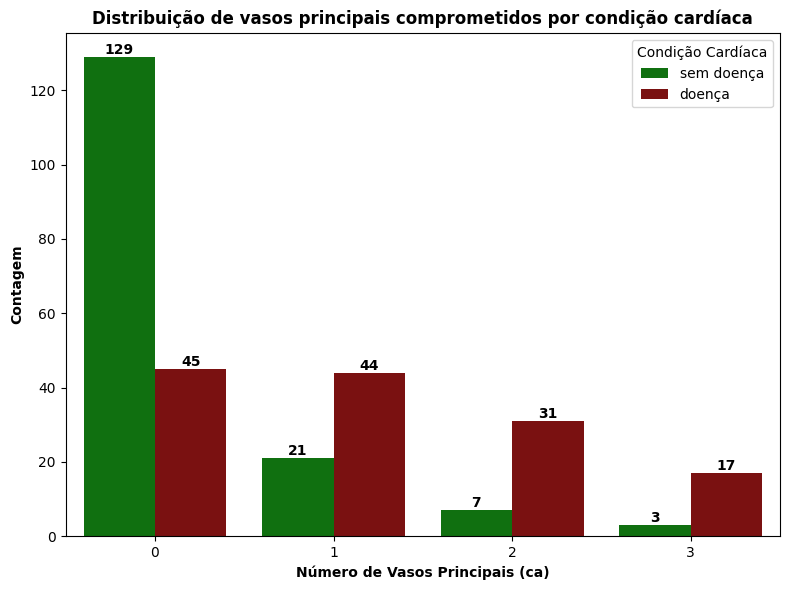

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='ca', hue='condition_label', palette=['green','#8B0000'])
plt.xlabel('Número de Vasos Principais (ca)', fontweight='bold')
plt.ylabel('Contagem', fontweight='bold')
plt.title('Distribuição de vasos principais comprometidos por condição cardíaca', fontweight='bold')
plt.legend(title='Condição Cardíaca')

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

*Gráfico 10: Distribuição de vasos principais comprometidos por condição cardíaca*

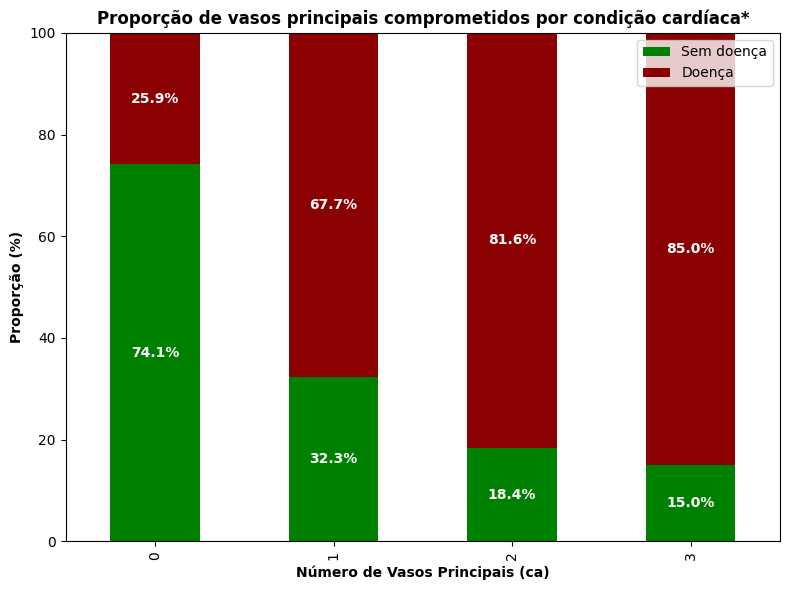

In [20]:
# Calcula a proporção (%) de cada valor de 'ca' por 'condition_label'
ca_condition_prop = pd.crosstab(df['ca'], df['condition_label'], normalize='index') * 100

# Plota o gráfico de barras empilhadas
ax = ca_condition_prop[['sem doença', 'doença']].plot(
    kind='bar',
    stacked=True,
    color=['green','#8B0000'],
    figsize=(8, 6)
)
ax.set_xlabel('Número de Vasos Principais (ca)', fontweight='bold')
ax.set_ylabel('Proporção (%)', fontweight='bold')
ax.set_title('Proporção de vasos principais comprometidos por condição cardíaca*', fontweight='bold')
ax.set_ylim(0, 100)
ax.legend(['Sem doença', 'Doença'])

# Adiciona os valores percentuais nas barras
for i, row in enumerate(ca_condition_prop[['sem doença', 'doença']].values):
    bottom = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, bottom + val / 2, f"{val:.1f}%", ha='center', va='center', color='white', fontweight='bold')
        bottom += val

plt.tight_layout()
plt.show()

*Gráfico 11: Proporção de vasos principais comprometidos por condição cardíaca*

Analisando o Gráfico 10 e o Gráfico 11, pode-se concluir que:

- As pessoas que não tem doença cardíaca, com zero vazos tem maior proporção (129 casos; 74,1%) do que em relação as pessoas com doença cardíaca (45 casos; 25,9%);
- A medida que o número de vasos principais comprometidos aumenta (1 até 3 vasos comprometidos), temos um aumento vertiginoso de pessoas com doença cardíaca (de 67,7% (44 casos) com 1 vaso comprometido até 85% (17 casos), em 3 vasos comprometidos) do que em relação as pessoas sem doença cardíaca que decai a proporção (de 32,3% (21 casos) com 1 vaso comprometido até 15,0% (3 casos), em 3 vasos comprometidos), e isso, reforça o comprometimento de muúltiplos vasos comprometidos de pessosas com problemas cardíacos;


##### 2.3.11 Matriz de correlação das condições clínicas


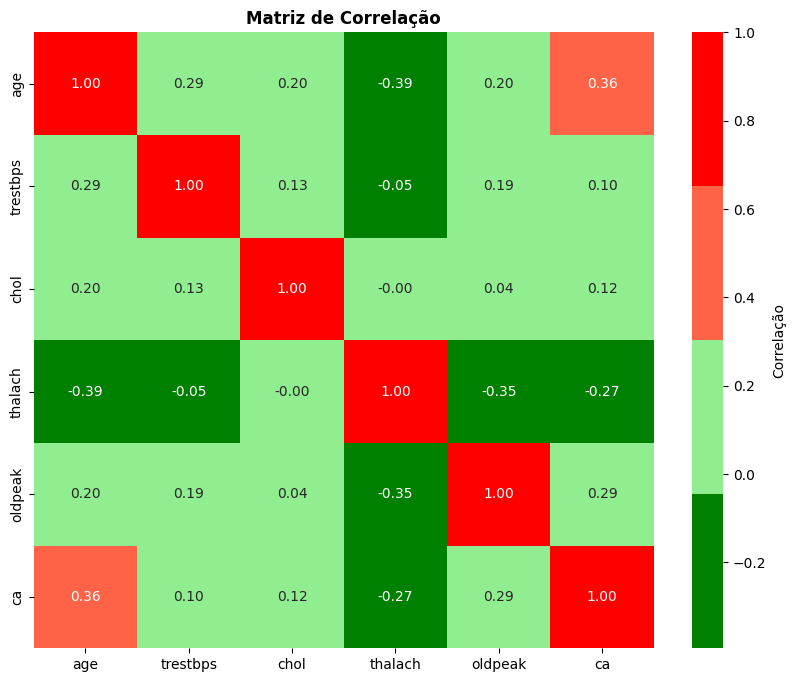

In [21]:
# Matriz de correlação apenas para variáveis numéricas
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=["green", "lightgreen", "#FF6347", "red"],
    cbar_kws={'label': 'Correlação'}
)
plt.title('Matriz de Correlação', fontweight='bold')
plt.show()

*Gráfico 12: Matriz de Correlação das condições clínicas*

Analisando o Gráfico 12 referente a matriz de correlação das condições clínicas, têm-se:
- Não existe uma correlação forte e fraca entre as variáveis clínicas;

*Idade (age)*

- Possui uma correlação fraca positiva com número de vasos principais (ca = 0,36) e pressão arterial em repouso (trestbps = 0,29),depressão induzida pelo exercício (Oldpeak = 0,20) e colesterol alto (chol = 0,20);
- Correlação fraca negativa com frequência cardíaca máxima (thalach = -0,39);

*Pressão arterial em repouso (trestbps)*
- Correlaciona fracamente com age (0,29), mas pouco com outros fatores.

*Colesterol total (chol)*
- Com a variável age (0,20) tem correlação fraca positiva e o restante das condições clínicas tem discretas correlações;

*Máxima frequência cardíaca (thalach)*
- Fraca correlação negativa com age (-0,39) e oldpeak (-0,35) e ca (-0,27) e o restante das condições clínicas tem discretas correlações;

*Depressão induzida pelo exercicio (oldpeak)*
- Fraca correlação negativa entre age (0,20) e ca (0,29) e o restante das condições clínicas tem discretas correlações;

*Número de vasos principais (ca)*
- Fraca correlação positiva age (0,36) e oldpeak (0,29) e negativa thalach (-0,27) e o restante das condições clínicas tem discretas correlações;

Com as análises de cada variável:
- Variáveis centrais para modelos de predição de doença cardíaca são: *age, thalach, oldpeak e ca*;
- Variável age se correlaciona com todas as outras variáveis clínicas;
- As variáveis *chol e trestbps* possuem correlações menos brandas, então podem ter pouca preditivade com as outras variáveis clínicas com menos iteraçoes.

*O próximo passo é realizar o processo de limpeza para a etapa de pré-processamento de dados.*

# 3. Pré-Processamento de Dados e Preparação dos Dados

- Nesta etapa, realizaremos a limpeza e a organização do dataset antes da modelagem. Essa fase é essencial para o desenvolvimento de modelos preditivos confiáveis.
- Como o conjunto de dados Heart Disease Cleveland UCI não apresenta valores ausentes, não foi necessário aplicar técnicas de imputação de missing values.
- Mesmo assim, confirmaremos por meio de análise descritiva se existem valores nulos ou inconsistências que demandem tratamento.
- Por fim, dividiremos o dataset em conjuntos de treino e teste, avaliaremos a aplicação de validação cruzada e, em seguida, aplicaremos o tratamento de outliers (tratamento dos dados) para que valores extremos não comprometam as inferências do modelo na próxima etapa.


##### 3.1 Tratamento de valores nulos

Nesta etapa, iremos verificar, se as condições clínica do dataset Heart Disease Cleveland UCI possui valores nulos, pois é importante na definição de exclusão de linhas, e influi no preenchimento média/mediana/moda.

In [22]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


age                0
trestbps           0
chol               0
thalach            0
oldpeak            0
ca                 0
sex_label          0
cp_label           0
fbs_label          0
restecg_label      0
exang_label        0
slope_label        0
thal_label         0
condition_label    0
dtype: int64

*Tabela 6: Valores nulos das condições clínicas*


De acordo com a tabela 6, o dataset Heart Disease Cleveland UCI não possui valores nulos.

##### 3.2 Treino e Teste

In [23]:
###criando variaveis categóricas com labels das variáveis originais

# Cria os labels para a coluna 'condition'
condition = {
    "doença" :1,
    "sem doença" : 0,

}

df['condition'] = df['condition_label'].map(condition)
df[['condition', 'condition_label']].head()

##labels da coluna Sex
sex = {
    "masculino" :1,
    "feminino" : 0,

}

df['sex'] = df['sex_label'].map(sex)
df[['sex', 'sex_label']].head()

# Cria os labels para a coluna 'cp'
cp = {
    "angina típica (dor no peito tipica)" :0,
    "angina atípica (dor no peito, não relacionada ao coração)" : 1,
    "dor não anginosa (espasmos, não relacionados ao coração)" : 2,
    "assintomático (dor toraxica, sem sinais da doença)" :3
}

df['cp'] = df['cp_label'].map(cp)
df[['cp', 'cp_label']].head()


# Cria a coluna de labels para a variável 'fbs'
df['fbs'] = df['fbs_label'].map({'verdadeiro' :0, 'falso' :1})
df[['fbs', 'fbs_label']].head()


# Cria a coluna de labels para a variável 'restecg'
restecg = {
    "normal" :0,
    "com anormalidade da onda ST-T (inversões da onda T e/ou supradesnivelamento ou infradesnivelamento do segmento ST > 0,05 mV)" :1,
    "apresentando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes" :2
}

df['restecg'] = df['restecg_label'].map(restecg)
df[['restecg', 'restecg_label']].head()


# Cria a coluna de labels para a variável 'exang'
df['exang'] = df['exang_label'].map({'sim' :1, 'não' :0})
df[['exang', 'exang_label']].head()


# Cria os labels para a coluna 'slope'
slope = {
    "ascendente" :0,
    "plano"      :1,
    "descida"    :2
}

df['slope'] = df['slope_label'].map(slope)
df[['slope', 'slope_label']].head()


# Cria os labels para a coluna 'thal'
thal = {
    "normal"              :0,
    "defeito corrigido"   :1,
    "defeito reversível"  :2
}

df['thal'] = df['thal_label'].map(thal)
df[['thal', 'thal_label']].head()



####excluindo as colunas originais
df = df.drop(columns=[ 'sex_label','cp_label', 'fbs_label', 'restecg_label', 'exang_label', 'slope_label', 'thal_label', 'condition_label'])
df.head(5)

,age,trestbps,chol,thalach,oldpeak,ca,condition,sex,cp,fbs,restecg,exang,slope,thal
0,69,160,234,131,0.1,1,0,1,0,0,2,0,1,0
1,69,140,239,151,1.8,2,0,0,0,1,0,0,0,0
2,66,150,226,114,2.6,0,0,0,0,1,0,0,2,0
3,65,138,282,174,1.4,1,1,1,0,0,2,0,1,0
4,64,110,211,144,1.8,0,0,1,0,1,2,1,1,0


- **obs: Como os modelos de machine learning como regressão logística, árvores de decisão, SVM, etc., geralmente não conseguem lidar com strings diretamente. Eles esperam que todas as variáveis de entrada (X_train, X_test) sejam numéricas. Então, antes de realizar o Treino e Teste referente ao dataset Heart Disease Cleveland UCI, foi necessário converter as variáveis categóricas em numéricas**


In [24]:
# Separar features (X) e target (y)
X = df.drop('condition', axis=1)
y = df['condition']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Análise do Resultado de Treino e Teste do dataset Heart Disease Cleveland da UCI**

- A variável condition_label é o alvo (presença ou ausência de doença cardíaca).
- A estratificação garante que a proporção de classes seja mantida em treino e teste


##### 3.2 Método de Validação cruzada

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

- Será utilizado o método de validação cruzada, pois o dataset Heart Disease Cleveland da UCI, possui uma amostra de 297 observações, tamanho moderado, com o objetivo de reduzir o risco de overfitting.
- A validação cruzada (como K-Fold) ajuda a garantir que o modelo seja avaliado de forma mais robusta, usando diferentes divisões dos dados.



##### 3.3 Transformação dos dados


Abaixo será feito o tratamento dos dados observados nas variáveis clínicas. Para esse tratamento, foi feito:

- Normalização pela Média;
- Normalização pela Mediana;
- Transformação de Box-Cox;
- Remoção de Outliers.

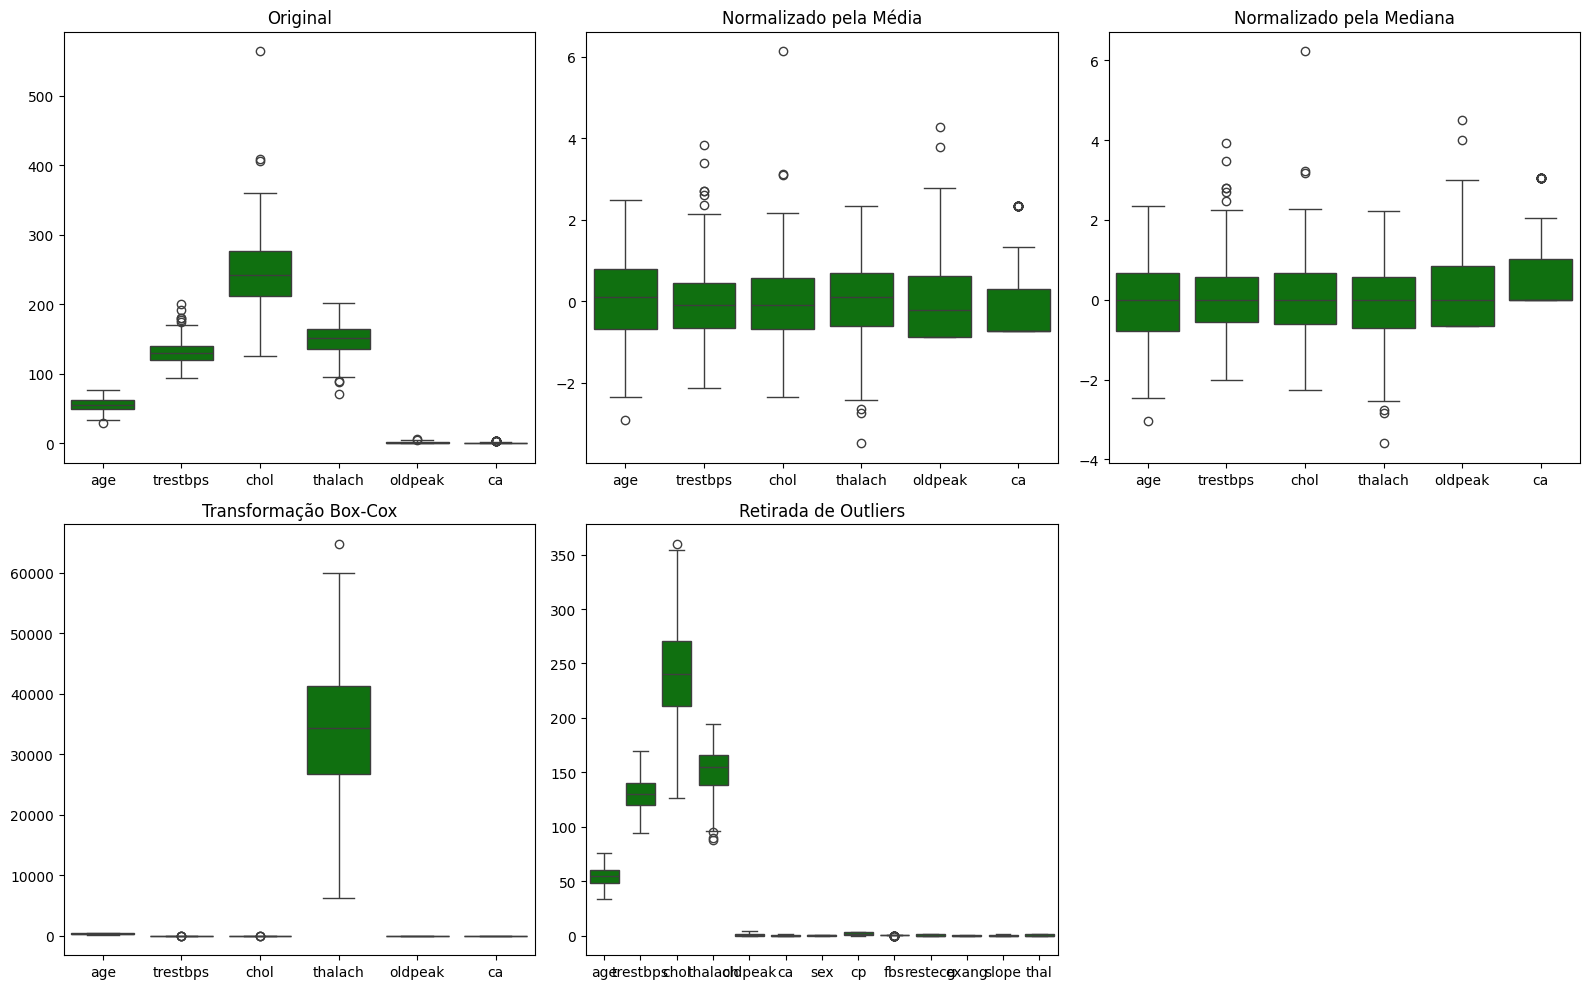

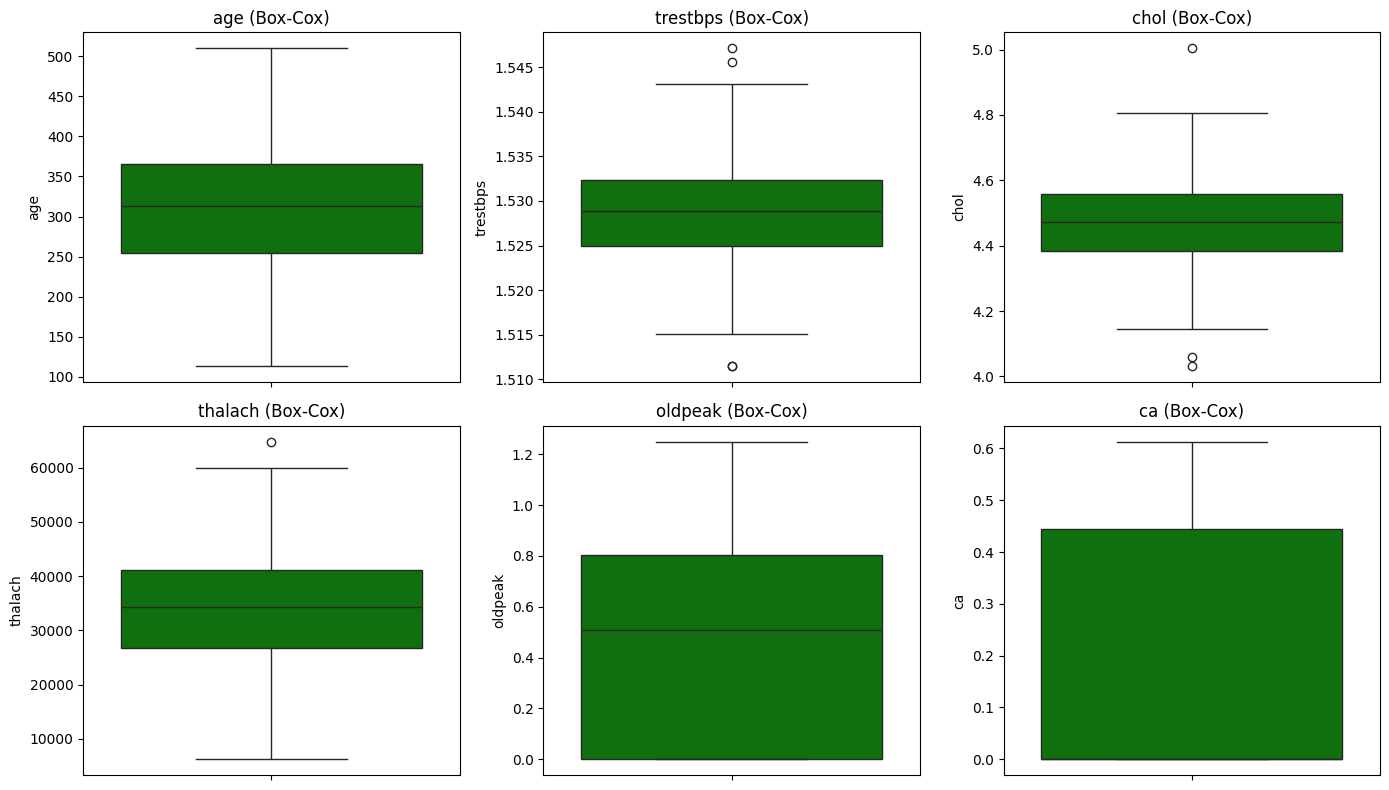

In [26]:
###### tipos de tratamento para Outliers

# Selecionando apenas colunas numéricas das variaveis clinicas para as transformações
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

#normalização pela media
df_mean = X_train[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())

#normalização pela mediana
df_median = X_train[numeric_cols].apply(lambda x: (x - x.median()) / x.std())

#Transformação box-cox
df_boxcox = pd.DataFrame()

for col in numeric_cols:
    # Evita valores zero ou negativos
    data = X_train[col].copy()
    if (data <= 0).any():
        data = data + 1  # Ajusta para evitar zeros
    transformed, _ = boxcox(data)
    df_boxcox[col] = transformed


# Removendo Outliers pelo com base no IQR
def remove_outliers_iqr(df, cols):
    df_clean = X_train.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)
        df_clean = df_clean[mask]
    return df_clean

df_outlier_free = remove_outliers_iqr(df, numeric_cols)


#################################plotando os resultados por boxplot
plt.figure(figsize=(16, 10))

# Original
plt.subplot(2, 3, 1)
sns.boxplot(data=X_train[numeric_cols], color='green')
plt.title('Original')

# Pela média
plt.subplot(2, 3, 2)
sns.boxplot(data=df_mean, color='green')
plt.title('Normalizado pela Média')

# Pela mediana
plt.subplot(2, 3, 3)
sns.boxplot(data=df_median, color='green')
plt.title('Normalizado pela Mediana')

# Box-Cox
plt.subplot(2, 3, 4)
sns.boxplot(data=df_boxcox, color='green')
plt.title('Transformação Box-Cox')

# retirada de outliers
plt.subplot(2, 3, 5)
sns.boxplot(data=df_outlier_free, color='green' )
plt.title('Retirada de Outliers')

plt.tight_layout()
plt.show()


####escolhido (transformação box-cox)
plt.figure(figsize=(14, 8))
for i, col in enumerate(df_boxcox.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_boxcox[col], color='green')
    plt.title(f'{col} (Box-Cox)')
plt.tight_layout()
plt.show()



*Gráfico 13: Boxplot dos tratamentos de Outliers das condições clínicas*


In [27]:
# dimensão do dataset
print("dimensão do dataset:", df_boxcox.shape)

# Informações sobre tipos de dados e valores ausentes
df_boxcox.info()

# Resumo estatístico de variáveis ​​numéricas
df_boxcox.describe()

dimensão do dataset: (237, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       237 non-null    float64
 1   trestbps  237 non-null    float64
 2   chol      237 non-null    float64
 3   thalach   237 non-null    float64
 4   oldpeak   237 non-null    float64
 5   ca        237 non-null    float64
dtypes: float64(6)
memory usage: 11.2 KB


,age,trestbps,chol,thalach,oldpeak,ca
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,307.389593,1.528871,4.470432,34067.591534,0.447906,0.213207
std,74.760666,0.006326,0.131627,10673.722162,0.391548,0.258502
min,113.524644,1.511503,4.032185,6234.888881,0.000000,0.000000
25%,254.638928,1.524898,4.382517,26722.040958,0.000000,0.000000
50%,312.675920,1.528863,4.472090,34278.660524,0.508691,0.000000
75%,365.625818,1.532363,4.557154,41192.903031,0.803182,0.444363
max,510.047180,1.547121,5.004218,64797.230232,1.250295,0.613414


In [28]:
# Calculando o intervalo interquartílico (IQR), limite inferior e limite superior para variáveis numéricas
q1 = df_boxcox.select_dtypes(include=['int64', 'float64']).quantile(0.25)
q3 = df_boxcox.select_dtypes(include=['int64', 'float64']).quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print("Intervalo Interquartílico (IQR):")
print(iqr)
print("-" * 40)
print("\nLimite Inferior:")
print(limite_inferior)
print("-" * 40)
print("\nLimite Superior:")
print(limite_superior)

Intervalo Interquartílico (IQR):
age           110.986889
trestbps        0.007465
chol            0.174637
thalach     14470.862074
oldpeak         0.803182
ca              0.444363
dtype: float64
----------------------------------------

Limite Inferior:
age           88.158594
trestbps       1.513700
chol           4.120562
thalach     5015.747847
oldpeak       -1.204773
ca            -0.666544
dtype: float64
----------------------------------------

Limite Superior:
age           532.106152
trestbps        1.543560
chol            4.819108
thalach     62899.196141
oldpeak         2.007955
ca              1.110907
dtype: float64


*Tabela 7: Estatísticas Descritivas das condições clínicas sem outliers*


Análise dos Boxplots das Transformações das Variáveis Clínicas no Gráfico 13:
- *Normalização pela Média/Mediana*: As transformações utilizando a média não foram eficazes na suavização dos efeitos dos outliers. Isso pode ser atribuído à influência significativa dos valores extremos, além de a normalização pela mediana não ter proporcionado melhorias relevantes em relação aos dados originais.
- *Remoção de Outliers via ICS*: Embora a técnica tenha conseguido eliminar as observações discrepantes, a amostra foi reduzida de 237 para 206 observações, resultando em perda de informação. Por esse motivo, optou-se por descartar essa abordagem, uma vez que pode impactar negativamente os resultados na etapa de modelagem.
- *Transformação Box-Cox*: Essa técnica demonstrou ser a mais eficaz, promovendo uma simetrização das variáveis com distribuições originalmente assimétricas, aproximando-as de uma distribuição normal. Além disso, contribui para a redução dos efeitos dos outliers — embora as variáveis trestbps e chol ainda apresentem algumas observações discrepantes e as variáveis age, thalach, oldpeak e ca estão com os valores sem outliers e distribuição simétrica.
- Depois de aplicada a técnica de Box-cox, pela tabela 7, verificamos que a média e a mediana das condições clinicas estão no mesmo alinhamento dos valores;

Na próxima etapa, será feita a a técnica de one-not-encoding, para transformar as variáveis categóricas em variáveis numéricas, para que seja possível aplicar os modelos de machine learning e também será feita a separação do dataset em treino e teste, para que seja possível aplicar os modelos de machine learning.

# 4. Modelagem e Treinamento

### 4.1 Definição dos modelos a serem utilizados

01. Nesta etapa, serão construídos e avaliados modelos de Machine Learning com o objetivo de identificar o algoritmo mais representativo para os dados clínicos do dataset Heart Disease Cleveland. O propósito central é desenvolver um modelo capaz de prever a presença de doença cardíaca com base em variáveis clínicas dos pacientes;

02. Como os dados clínicos do dataset Heart Disease Cleveland é um problema de classificação binária de prever se o paciente tem ou não problemas cardíacos,então, os modelos escolhidos foram: 

- Logistic Regression: é um modelo estatístico clássico e direto para classificação binária, ideal quando há uma relação linear entre as variáveis;
- Random Forest: modelo baseado em múltiplas árvores de decisão, nessas árvores cria vários subconjuntos aleatórios de dados e variáveis, e a decisão final é feita por votação, sendo robusto contra overfitting, lida bem com dados não lineares e variáveis categóricas ou numéricas.
- Gradient Boosting (XGBoost ou LightGBM): constrói um conjunto de árvores sequenciais que corrigem erros anteriores, levando a alta acurácia em classificação binária, requer cuidado com overfitting e tuning de hiperparâmetros;
- Support Vector Machine (SVM): É ideal para problemas de classificação binária com margens claras entre classes, sendo eficiente em espaços de alta dimensão, funciona bem com dados não linearmente separáveis usando kernels;
- K-Nearest Neighbors (KNN): Útil como baseline, mas sensível à escala e à dimensionalidade.




https://www.youtube.com/watch?v=SvmFqZ4cD-I&list=PLKjVxavtDGeOpnY-ESOHzob3JEgfo0vCS&index=5 (ve video e entender a treta do trampo)

https://www.youtube.com/watch?v=CWxaXyXZ-1A&t=736s validação cruzada

modelos



In [29]:
#modelos (pepilines) a serem testados (função para rodar os Pipelinesos e calcular a acurácia de cada um)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()

}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    models_scores = {}
    for name, models in models.items():
        models.fit(X_train, y_train)
        models_scores[name] = models.score(X_test, y_test)
    return models_scores


scores = fit_and_score(models, X_train, y_train, X_test, y_test)
for models, acc in scores.items():
    print(f"modelos: {models}")
    print(f"Acurácia: {acc:.2f}")
    print("-" * 30)

c:\Users\luis claudio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


modelos: Logistic Regression
Acurácia: 0.90
------------------------------
modelos: Random Forest
Acurácia: 0.85
------------------------------
modelos: Gradient Boosting
Acurácia: 0.87
------------------------------
modelos: SVM
Acurácia: 0.55
------------------------------
modelos: KNN
Acurácia: 0.58
------------------------------


*Tabela 8: Acurácia dos modelos KMN, Logistic Regression e Random Forest dados clínicos do dataset Heart Disease Cleveland*

- Avaliando a Acurácia dos modelos, de acordo com a tabela 8, pode-se concluir pela que os modelos referentes aos dados clínicos do dataset Heart Disease Cleveland, o modelo KNeighborsClassifier (KMN) possui a pior acurácia de 58%, enquanto modelo Logistic Regression possui a melhor acurácia cerca de 90%

### 4.2 Ajuste de Hiperparâmetros

**def. O hiperparâmetro é um parâmetro externo ao modelo de aprendizado de máquina que controla o processo de treinamento, mas não é aprendido diretamente a partir dos dados. Ele é definido antes do treinamento começar e pode ter um impacto significativo na performance do modelo**

- É recomendável fazer ajustes de hiperparâmetros no dataset Heart Disease Cleveland de doenças cardíacas, ele tem um número moderado de variáveis e instâncias, que permite aplicar técnicas de otimização sem cobrecarregar o tempo de processamento;

- Abaixo será realizado o Pepiline de ajuste de Hiperparâmetros com objetivo de melhorar a performance dos modelos.


Logistic Regression


c:\Users\luis claudio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GridSearchCV -> best cv score: 0.83 | test score: 0.90
GridSearchCV -> best params: {'C': 0.1, 'penalty': 'l2'}
RandomizedSearchCV -> best cv score: 0.83 | test score: 0.90
RandomizedSearchCV -> best params: {'penalty': 'l2', 'C': 0.1}


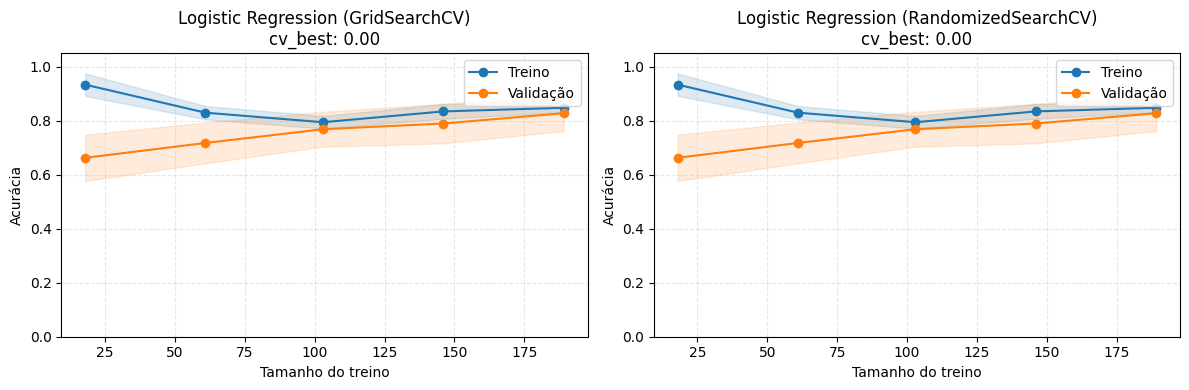


Random Forest
GridSearchCV -> best cv score: 0.80 | test score: 0.87
GridSearchCV -> best params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
RandomizedSearchCV -> best cv score: 0.80 | test score: 0.87
RandomizedSearchCV -> best params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}


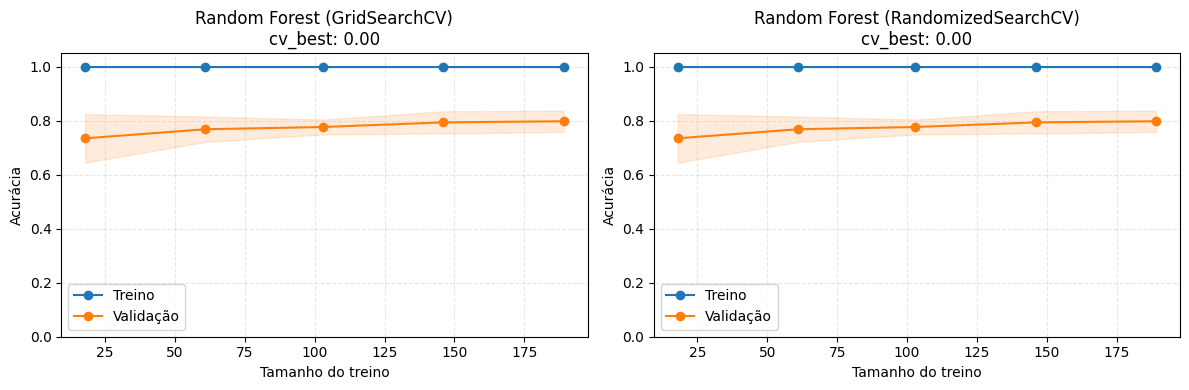


Gradient Boosting
GridSearchCV -> best cv score: 0.78 | test score: 0.78
GridSearchCV -> best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
RandomizedSearchCV -> best cv score: 0.78 | test score: 0.78
RandomizedSearchCV -> best params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}


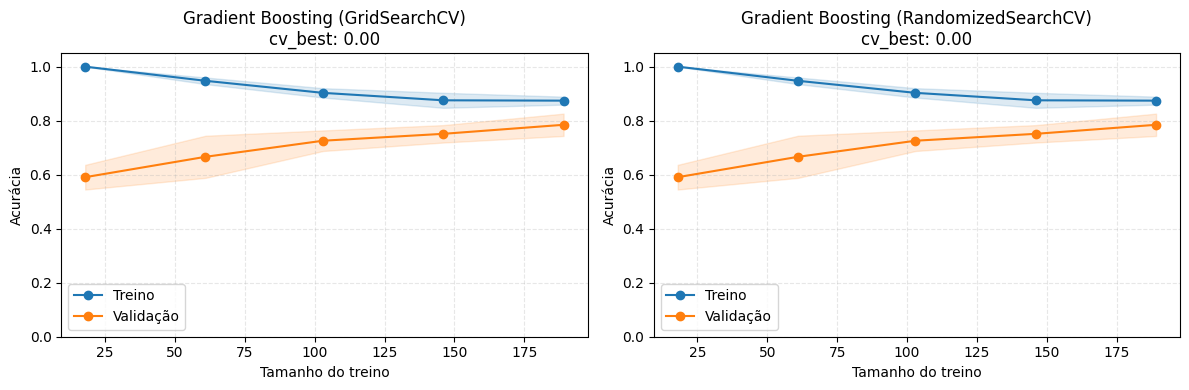


SVM
GridSearchCV -> best cv score: 0.81 | test score: 0.90
GridSearchCV -> best params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
RandomizedSearchCV -> best cv score: 0.81 | test score: 0.90
RandomizedSearchCV -> best params: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}


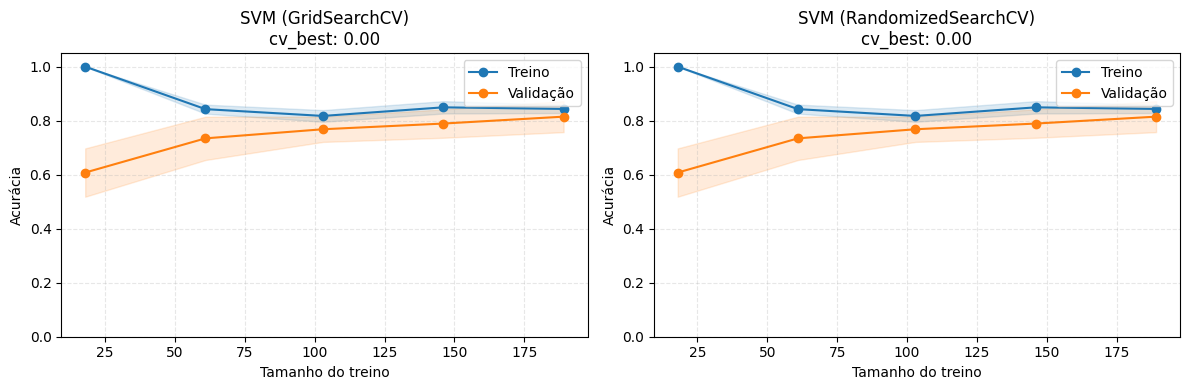


KNN


c:\Users\luis claudio\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GridSearchCV -> best cv score: 0.68 | test score: 0.62
GridSearchCV -> best params: {'n_neighbors': 7, 'weights': 'uniform'}
RandomizedSearchCV -> best cv score: 0.68 | test score: 0.62
RandomizedSearchCV -> best params: {'weights': 'uniform', 'n_neighbors': 7}


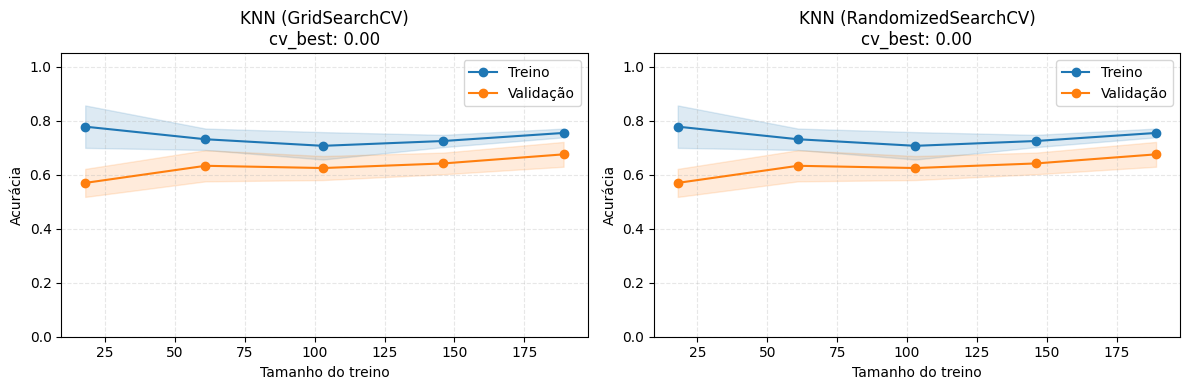


Hiperparâmetros finais por modelo (Grid / Randomized):
- Logistic Regression:
    GridSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'C': 0.1, 'penalty': 'l2'}
    RandomizedSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'penalty': 'l2', 'C': 0.1}
- Random Forest:
    GridSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
    RandomizedSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
- Gradient Boosting:
    GridSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
    RandomizedSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}
- SVM:
    GridSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
    RandomizedSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'kernel': 'linear', 'gamma': 'scale', 'C':

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve
import numpy as np
import pandas as pd

# Hiperparâmetros: GridSearchCV vs RandomizedSearchCV + Learning Curves lado a lado
import matplotlib.pyplot as plt

# Definição dos modelos e espaços de busca
estimators = {
    "Logistic Regression": {
        "est": LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
        "grid": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]},
        "rand_dist": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]}
    },
    "Random Forest": {
        "est": RandomForestClassifier(random_state=42),
        "grid": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10], "max_features": ["sqrt", "log2"]},
        "rand_dist": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10], "max_features": ["sqrt", "log2"]}
    },
    "Gradient Boosting": {
        "est": GradientBoostingClassifier(random_state=42),
        "grid": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]},
        "rand_dist": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
    },
    "SVM": {
        "est": SVC(probability=True, random_state=42),
        "grid": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]},
        "rand_dist": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}
    },
    "KNN": {
        "est": KNeighborsClassifier(),
        "grid": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
        "rand_dist": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
    }
}

results_summary = []

# parâmetros comuns às buscas
search_kwargs = dict(cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)

for name, cfg in estimators.items():
    print(f"\n{'='*60}\n{name}\n{'='*60}")
    est = cfg["est"]
    param_grid = cfg["grid"]
    param_rand = cfg["rand_dist"]

    # GridSearchCV
    grid = GridSearchCV(estimator=est, param_grid=param_grid, **search_kwargs)
    grid.fit(X_train, y_train)
    grid_best = grid.best_estimator_
    grid_best_score = grid.best_score_
    grid_test_score = grid_best.score(X_test, y_test)

    # RandomizedSearchCV (n_iter pequeno para tempo de execução)
    rand = RandomizedSearchCV(estimator=est, param_distributions=param_rand, n_iter=10, random_state=42, **search_kwargs)
    rand.fit(X_train, y_train)
    rand_best = rand.best_estimator_
    rand_best_score = rand.best_score_
    rand_test_score = rand_best.score(X_test, y_test)

    # Armazenar resumo bonito
    results_summary.append({
        "model": name,
        "search": "GridSearchCV",
        "best_cv_score": round(grid_best_score, 2),
        "test_score": round(grid_test_score, 2),
        "best_params": grid.best_params_
    })
    results_summary.append({
        "model": name,
        "search": "RandomizedSearchCV",
        "best_cv_score": round(rand_best_score, 2),
        "test_score": round(rand_test_score, 2),
        "best_params": rand.best_params_
    })

    # Exibir resultados detalhados por modelo
    print("GridSearchCV -> best cv score: {:.2f} | test score: {:.2f}".format(grid_best_score, grid_test_score))
    print("GridSearchCV -> best params:", grid.best_params_)
    print("RandomizedSearchCV -> best cv score: {:.2f} | test score: {:.2f}".format(rand_best_score, rand_test_score))
    print("RandomizedSearchCV -> best params:", rand.best_params_)

    # Learning Curves para os dois melhores estimadores (Grid x Random)
    train_sizes = np.linspace(0.1, 1.0, 5)
    plt.figure(figsize=(12, 4))

    for i, (label, estimator_best) in enumerate([("GridSearchCV", grid_best), ("RandomizedSearchCV", rand_best)]):
        train_sizes_abs, train_scores, val_scores = learning_curve(
            estimator_best, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
        )
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        ax = plt.subplot(1, 2, i + 1)
        ax.plot(train_sizes_abs, train_mean, 'o-', color='tab:blue', label='Treino')
        ax.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.15, color='tab:blue')
        ax.plot(train_sizes_abs, val_mean, 'o-', color='tab:orange', label='Validação')
        ax.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.15, color='tab:orange')
        ax.set_title(f"{name} ({label})\ncv_best: {0:.2f}".format(grid_best_score if label=="GridSearchCV" else rand_best_score))
        ax.set_xlabel("Tamanho do treino")
        ax.set_ylabel("Acurácia")
        ax.set_ylim(0.0, 1.05)
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.legend()

    plt.tight_layout()
    plt.show()

# Exibir resumo consolidado em tabela elegante
summary_df = pd.DataFrame(results_summary)
# Formatar melhor a coluna de parâmetros como strings curtas
summary_df["best_params"] = summary_df["best_params"].apply(lambda p: str(p))
summary_df = summary_df[["model", "search", "best_cv_score", "test_score", "best_params"]]
#print("\nResumo consolidado (valores com 2 casas decimais):")
#display(summary_df.style.hide_index())

# Além do resumo, mostrar para cada modelo os hiperparâmetros finais (melhor encontrados)
print("\nHiperparâmetros finais por modelo (Grid / Randomized):")
for model in estimators.keys():
    g = summary_df[(summary_df.model == model) & (summary_df.search == "GridSearchCV")].iloc[0]
    r = summary_df[(summary_df.model == model) & (summary_df.search == "RandomizedSearchCV")].iloc[0]
    print(f"- {model}:")
    print(f"    GridSearchCV -> best_cv: {g.best_cv_score:.2f} | test: {g.test_score:.2f} | params: {g.best_params}")
    print(f"    RandomizedSearchCV -> best_cv: {r.best_cv_score:.2f} | test: {r.test_score:.2f} | params: {r.best_params}")

*Tabela 9: Pepiline dos hiperparâmetros dos modelos KMN, Logistic Regression e Random Forest dados clínicos do dataset Heart Disease Cleveland*

*Grafico 14: learning curves dos hiperparâmetros dos modelos KMN, Logistic Regression e Random Forest dados clínicos do dataset Heart Disease Cleveland*

Analisando a Tabela 9 e o gráfico 14, temos:

1. Utilizou-se as técnicas GridSearchCV e RandomizedSearchCV para explorar a melhor combinação dos modelos com ajustes de hiperparâmetros;
2. Foi ajustado os modelos abaixo com os seguintes hiperparâmetros:
Hiperparâmetros finais por modelo (Grid / Randomized):
- **Logistic Regression:
    GridSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'C': 0.1, 'penalty': 'l2'}
    RandomizedSearchCV -> best_cv: 0.83 | test: 0.90 | params: {'penalty': 'l2', 'C': 0.1}**
- **Random Forest:
    GridSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
    RandomizedSearchCV -> best_cv: 0.80 | test: 0.87 | params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}**
- **Gradient Boosting:
    GridSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
    RandomizedSearchCV -> best_cv: 0.78 | test: 0.78 | params: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}**
- **SVM:
    GridSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
    RandomizedSearchCV -> best_cv: 0.81 | test: 0.90 | params: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}**
- **KNN:
    GridSearchCV -> best_cv: 0.68 | test: 0.62 | params: {'n_neighbors': 7, 'weights': 'uniform'}
    RandomizedSearchCV -> best_cv: 0.68 | test: 0.62 | params: {'weights': 'uniform', 'n_neighbors': 7}**


-> Para Logistic Regression, Random Forest, Gradient Boosting e SVM
O CV score (0.83; 0.80; 0.78; 0.81) é menor ou igual ao test score (0.90; 0.87; 0.78; 0.90).
Isso indica que não há indício de overfitting — ou seja, o desempenho no teste não é pior que o desempenho médio nos folds de validação.

-> Para KNN
O CV score (0.68) é maior que o test score (0.62) e são muito baixos
Esse gap de 0.06 sugere que o modelo não aprendeu bem aos padrões dos dados, podendo indicar problema de underffiting e um leve problema de overfitting (CV score maior que o test score)

3. Analisaremos os gráficos Learning Curve para verificar possíveis problemas de overfitting e underffiting:

🔹 Logistic Regression

- Treino: ~0.92 → 0.85, Validação: ~0.66 → 0.83
- Observação: O gap inicial entre treino e validação é um pouco grande, mas conforme o tamanho do treino aumenta, a validação sobe e se aproxima do treino.
- Conclusão: Não há overfitting relevante. Modelo não underfit, pois ambos convergem em alta acurácia.

🔹 Random Forest
- Treino: ~1.0 (sempre alto)
- Validação: ~0.74 → 0.81
- Observação: Treino perfeito → modelo decorou os dados (sinal típico de overfitting no treino). Validação menor, mas melhora com mais dados.

Conclusão: Overfitting leve a moderado, mas generalização ainda aceitável. Não há underfitting, pois o modelo tem alta capacidade.

🔹 Gradient Boosting

- Treino: 1.0 → 0.88
- Validação: 0.60 → 0.78
- Observação: Gap inicial grande entre treino e validação. Treino diminui, validação aumenta com mais dados.
- Conclusão: Gap sugere underfitting inicial, modelo ainda não aprendeu completamente. Pode melhorar aumentando n_estimators ou learning_rate.

🔹 SVM (linear)

- Treino: ~1.0 → 0.85
- Validação: ~0.61 → 0.82
- Observação: Treino mais alto que validação → gap visível no início. Conforme aumenta dados, treino e validação se aproximam.
- Conclusão: Leve overfitting no início, mas se corrige com mais dados. No fim, generalização boa → não underfit.

🔹 KMN

- Treino: 0.8 → 0.7
- Validação: 0.60 → 0.7
- Observação: Gap inicial grande entre treino e validação. Treino diminui, validação aumenta com mais dados.
- Conclusão: Gap sugere underfitting inicial, modelo ainda não aprendeu completamente. Pode melhorar aumentando n_estimators ou learning_rate.


